# Housing Price Regressor

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [3]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [4]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [5]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, Y_train_full, Y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train_full, Y_train_full, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [7]:
np.random.seed(42)
tf.random.set_seed(42)

In [8]:
X_train.shape, X_valid.shape, X_test.shape

((11610, 8), (3870, 8), (5160, 8))

In [9]:
Y_train.shape, Y_valid.shape, Y_test.shape

((11610,), (3870,), (5160,))

In [10]:
X_train.shape[1:], X_train.shape[1] 

((8,), 8)

In [11]:
model = keras.models.Sequential([
  # keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1]),
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
# model = keras.models.Sequential()
# model.add(keras.layers.Dense(30, activation="relu", input_shape=[8]))
# model.add(keras.layers.Dense(30, activation="relu"))
# model.add(keras.layers.Dense(1))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss='mean_squared_error',
             optimizer = keras.optimizers.SGD(lr=1e-3),
             metrics=['mae'])

In [14]:
model_history = model.fit(X_train, Y_train,
                         epochs=20,
                         validation_data=(X_valid, Y_valid))

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 1.8866 - mae: 0.9900 - val_loss: 0.7126 - val_mae: 0.6368
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6577 - mae: 0.6042 - val_loss: 0.6880 - val_mae: 0.5704
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5934 - mae: 0.5618 - val_loss: 0.5803 - val_mae: 0.5352
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5557 - mae: 0.5398 - val_loss: 0.5166 - val_mae: 0.5207
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5272 - mae: 0.5237 - val_loss: 0.4895 - val_mae: 0.5022
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5033 - mae: 0.5113 - val_loss: 0.4951 - val_mae: 0.4934
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4854 - mae: 0.5010 - val_loss: 0.4861 - val_mae: 0.4838
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [15]:
model_history.params

{'verbose': 1, 'epochs': 20, 'steps': 363}

In [16]:
model_history.history

{'loss': [1.8866397142410278,
  0.6577127575874329,
  0.5934185981750488,
  0.5557191967964172,
  0.5271904468536377,
  0.5032975673675537,
  0.48535558581352234,
  0.47091811895370483,
  0.45779934525489807,
  0.4474469721317291,
  0.4393136501312256,
  0.43176087737083435,
  0.4260515868663788,
  0.42017653584480286,
  0.41549986600875854,
  0.4111650586128235,
  0.4077068865299225,
  0.4039528965950012,
  0.4004494547843933,
  0.3979603350162506],
 'mae': [0.9900257587432861,
  0.6041510105133057,
  0.5618006587028503,
  0.5398454070091248,
  0.5237293839454651,
  0.5112562775611877,
  0.5010154247283936,
  0.492448091506958,
  0.4857262969017029,
  0.47973746061325073,
  0.4744163453578949,
  0.4703480303287506,
  0.46740880608558655,
  0.46360209584236145,
  0.461266428232193,
  0.4591343402862549,
  0.4568699896335602,
  0.45453646779060364,
  0.4521065056324005,
  0.45083147287368774],
 'val_loss': [0.7126054167747498,
  0.6880087852478027,
  0.5803284645080566,
  0.516608536243

In [17]:
mse_test = model.evaluate(X_test, Y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3942 - mae: 0.4502


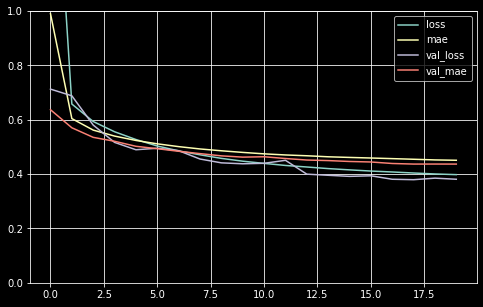

In [18]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.gca().set_ylim(0, 1)
plt.grid(True)
plt.show()

In [19]:
X_new = X_test[:3]

In [20]:
y_pred = model.predict(X_new)

In [21]:
print(y_pred)

[[0.5328768]
 [1.8915398]
 [3.4040868]]


In [22]:
print(Y_test[:3])

[0.477   0.458   5.00001]


## Delete Existing model and clear the keras cache and session

In [23]:
del model

In [24]:
keras.backend.clear_session()

## Creation of Functional Model

In [25]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output]) 

In [26]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]         

In [28]:
model.compile(loss="mean_squared_error",
             optimizer=keras.optimizers.SGD(lr=1e-3),
             metrics=["mae"])

In [41]:
model_history = model.fit(X_train, Y_train, epochs=40,
                             validation_data=(X_valid, Y_valid))

Epoch 1/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3832 - mae: 0.4424 - val_loss: 0.3895 - val_mae: 0.4317
Epoch 2/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3817 - mae: 0.4407 - val_loss: 0.4490 - val_mae: 0.4379
Epoch 3/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3803 - mae: 0.4407 - val_loss: 0.4168 - val_mae: 0.4327
Epoch 4/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3786 - mae: 0.4391 - val_loss: 0.3953 - val_mae: 0.4335
Epoch 5/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3777 - mae: 0.4384 - val_loss: 0.3828 - val_mae: 0.4302
Epoch 6/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3760 - mae: 0.4375 - val_loss: 0.4114 - val_mae: 0.4305
Epoch 7/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3753 - mae: 0.4366 - val_loss: 0.3860 - val_mae: 0.4293
Epoch 8/40
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [42]:
model_history.params

{'verbose': 1, 'epochs': 40, 'steps': 363}

In [43]:
model_history.history

{'loss': [0.3832426071166992,
  0.3816964626312256,
  0.3803323209285736,
  0.37862178683280945,
  0.3777286410331726,
  0.3760281801223755,
  0.37525632977485657,
  0.37399446964263916,
  0.37280282378196716,
  0.37184938788414,
  0.37113258242607117,
  0.3699040412902832,
  0.36925938725471497,
  0.3682663142681122,
  0.367383748292923,
  0.3665229082107544,
  0.36567753553390503,
  0.3653356432914734,
  0.36412525177001953,
  0.36341893672943115,
  0.3627758026123047,
  0.36179083585739136,
  0.3613032400608063,
  0.3603309988975525,
  0.35953953862190247,
  0.3590957820415497,
  0.35869574546813965,
  0.35781195759773254,
  0.3573063313961029,
  0.3564346432685852,
  0.3556230068206787,
  0.3552217483520508,
  0.35499829053878784,
  0.3540396988391876,
  0.35359057784080505,
  0.3529837429523468,
  0.3525215685367584,
  0.35194745659828186,
  0.3511991798877716,
  0.3505553901195526],
 'mae': [0.44241735339164734,
  0.44069957733154297,
  0.4407423436641693,
  0.43914365768432617,


In [44]:
mse_test = model.evaluate(X_test, Y_test)
print(mse_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3495 - mae: 0.4171
[0.34953758120536804, 0.417056679725647]


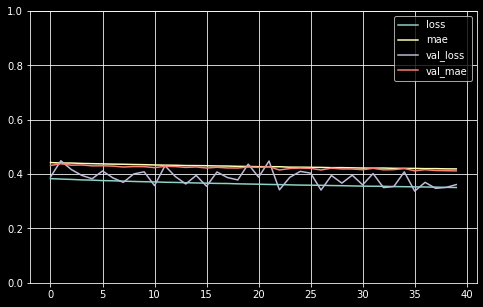

In [45]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [57]:
y_pred = model.predict(X_new)

In [ ]:
y_pred

In [ ]:
Y_test[:3]

# Saving and Loading the model

In [46]:
model.save("NN Functional Model - Housing Price Regressor.h5")

In [47]:
%pwd

'C:\\Users\\msimp\\Deep Learning'

In [48]:
%cd C:\\Users\\msimp\\Deep Learning

C:\Users\msimp\Deep Learning


In [50]:
del model

In [51]:
keras.backend.clear_session()

In [52]:
model = keras.models.load_model("NN Functional Model - Housing Price Regressor.h5")

In [53]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]         

In [54]:
y_pred = model.predict(X_new)

In [55]:
y_pred

array([[0.72742593],
       [1.6811948 ],
       [4.0875688 ]], dtype=float32)

In [56]:
Y_test[:3]

array([0.477  , 0.458  , 5.00001])